# Predictive Analytics: Prediksi Pembatalan Transaksi pada E-commerce UK


---

Oleh: Noer Hanifah Suganda


# A. Latar Belakang

Perusahaan e-commerce UK yang berbasis di London telah beroperasi sejak tahun 2007 dan menawarkan produk berupa hadiah serta homewares untuk berbagai kalangan, baik individu maupun bisnis kecil. Dataset yang digunakan dalam analisis ini mencakup 500 ribu transaksi selama satu tahun dengan 8 kolom informasi.

Meskipun sebagian besar transaksi berjalan lancar, terdapat persentase kecil transaksi yang dibatalkan. Pembatalan ini umumnya terjadi karena kondisi stok yang tidak memadai, sehingga pelanggan memilih untuk membatalkan transaksi agar dapat menerima semua produk sekaligus. Pembatalan transaksi tidak hanya mengganggu alur operasional, tetapi juga berdampak pada pendapatan dan kepuasan pelanggan.

Melihat kondisi tersebut, penting untuk mengidentifikasi faktor-faktor yang mempengaruhi pembatalan transaksi dan mengembangkan model prediksi yang mampu mendeteksi transaksi berisiko pembatalan. Dengan menerapkan pendekatan machine learning, perusahaan dapat mengambil langkah proaktif untuk mengoptimalkan manajemen inventori, mengurangi kerugian finansial, serta meningkatkan pengalaman pelanggan secara keseluruhan.


#B. Business Understanding

# Dalam industri e-commerce, pembatalan transaksi merupakan masalah yang signifikan. Transaksi yang dibatalkan—diidentifikasi melalui penanda "C" pada kolom TransactionNo—dapat mengganggu alur operasional, menyebabkan kerugian finansial, dan menurunkan kepuasan pelanggan. Seringkali, pembatalan terjadi karena kondisi stok yang tidak memadai, di mana pelanggan memilih untuk membatalkan transaksi jika tidak semua produk dapat dikirim sekaligus.

**Problem Statement:**

Bagaimana membangun model prediktif untuk mengidentifikasi transaksi yang berisiko tinggi dibatalkan?

## Data Loading

In [11]:
# Import library yang diperlukan
import pandas as pd
import numpy as np

df = pd.read_csv('Sales Transaction.csv')
print("Dataset Sales Transaction:")
print(df.head())


Dataset Sales Transaction:
  TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom  


# C. Exploratory Data Analysis (EDA)

## EDA - Deskripsi Variabel

In [12]:
df

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


Dataset ini memiliki lebih dari 500.000 baris data dan 8 kolom. Berikut adalah deskripsi masing-masing kolom:


1.   **TransactionNo** (kategorikal):
Merupakan nomor unik enam digit yang mendefinisikan setiap transaksi. Jika terdapat huruf "C" pada kode, artinya transaksi tersebut merupakan pembatalan
2. **Date** (numerik):
Menunjukkan tanggal saat transaksi terjadi.
3. **ProductNo** (kategorikal):
Karakter unik yang terdiri dari lima atau enam digit, digunakan untuk mengidentifikasi produk tertentu.
4. **Product** (kategorikal):
Nama produk atau barang yang dijual.
5. **Price** (numerik):
Harga per unit dari masing-masing produk, dihitung dalam pound sterling (£).
6. **Quantity** (numerik):
Jumlah produk yang dibeli dalam setiap transaksi. Nilai negatif menunjukkan transaksi yang dibatalkan.
7. **CustomerNo** (kategorikal):
Nomor unik yang terdiri dari lima digit untuk mengidentifikasi setiap pelanggan.
8. **Country** (kategorikal):
Nama negara di mana pelanggan tersebut berada.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Dari eksekusi method df.info() terdapat:


*   Terdapat 2 kolom numerik dengan tipe data float64 yaitu: Price dan CustomerNo.

*   Terdapat 5 kolom dengan tipe data object yaitu: TransactionNo, Date, ProductNo, ProductName, dan Country.

**Findings:**
*   Meskipun deskripsinya adalah "Date (numeric)" dalam penjelasan, data yang muncul berbentuk string (misalnya, "12/9/2019"). Agar dapat melakukan operasi tanggal (seperti filtering berdasarkan waktu, ekstraksi bulan/tahun, dsb.), maka akan dikonversi ke tipe datetime menggunakan pd.to_datetime().
*   CustomerNo (float64):
Meskipun disimpan sebagai float64, biasanya lebih tepat jika diubah menjadi tipe object atau string (atau integer jika tidak ada nilai hilang) untuk menghindari perlakuan numerik yang tidak diinginkan. Ada beberapa nilai yang hilang (536295 non-null dari 536350).



In [14]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:


*   Count  adalah jumlah sampel pada data.
Mean adalah nilai rata-rata.

*   Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama.
- Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

## EDA - Menangani Duplikasi, Missing Value, Perubahan Tipe Data dan Outliers

## **Menangani Duplikasi**

In [15]:
df.duplicated().sum()

5200

Output df.duplicated().sum() menghasilkan nilai 5200, yang berarti ada 5200 baris dalam DataFrame yang teridentifikasi sebagai duplikat. Maka perlu kita hapus.

In [16]:
df_noduplicates = df.drop_duplicates()

In [17]:
df_noduplicates

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom
...,...,...,...,...,...,...,...,...
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany


Dataset sudah berkurang karena duplikatnya telat dihapus




## **Menangani Missing Values**

In [18]:
df_noduplicates.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,55
Country,0


In [19]:
data_miss = df_noduplicates[df_noduplicates.isnull().any(axis=1)]
data_miss

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


Ditemukan 55 baris Null pada kolom CustomerNo. Maka akan kita hapus.:

In [20]:
df_noduplicates.dropna(inplace=True)
df_noduplicates.isnull().sum().sum()

<ipython-input-20-ab5597ce184c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates.dropna(inplace=True)


0

In [21]:
df_noduplicates.isnull().sum()

,0
TransactionNo,0
Date,0
ProductNo,0
ProductName,0
Price,0
Quantity,0
CustomerNo,0
Country,0


Sudah tidak ada missing value

## **Menangani Tipe Data yang Tidak Sesuai**

In [22]:
df_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  531095 non-null  object 
 1   Date           531095 non-null  object 
 2   ProductNo      531095 non-null  object 
 3   ProductName    531095 non-null  object 
 4   Price          531095 non-null  float64
 5   Quantity       531095 non-null  int64  
 6   CustomerNo     531095 non-null  float64
 7   Country        531095 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.5+ MB


- Kolom CustomerNo seharusnya berisi nilai unik yang mengidentifikasi masing-masing pelanggan. Maka akan diubah menjadi string yang lebih tepat.
- Meskipun deskripsinya adalah "Date (numeric)" dalam penjelasan, data yang muncul berbentuk string (misalnya, "12/9/2019"). Agar dapat melakukan operasi tanggal (seperti filtering berdasarkan waktu, ekstraksi bulan/tahun, dsb.)

In [23]:
df_noduplicates['Date'] = pd.to_datetime(df_noduplicates['Date'], format='%m/%d/%Y')


<ipython-input-23-53c3ed933e24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates['Date'] = pd.to_datetime(df_noduplicates['Date'], format='%m/%d/%Y')


konversi kolom Date ke tipe datetime menggunakan pd.to_datetime().

In [24]:
df_noduplicates['CustomerNo'] = df_noduplicates['CustomerNo'].astype(str)


<ipython-input-24-1434ad4dd119>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_noduplicates['CustomerNo'] = df_noduplicates['CustomerNo'].astype(str)


Konversi CustomerNo ke tipe string

In [25]:
df_noduplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531095 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  531095 non-null  object        
 1   Date           531095 non-null  datetime64[ns]
 2   ProductNo      531095 non-null  object        
 3   ProductName    531095 non-null  object        
 4   Price          531095 non-null  float64       
 5   Quantity       531095 non-null  int64         
 6   CustomerNo     531095 non-null  object        
 7   Country        531095 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.5+ MB


kolom Date sudah berubah tipe datanya ke datetime, dan kolom CustomerNo berubah ke object dengan isi String di dalamnya

## **Menangani Outliers**

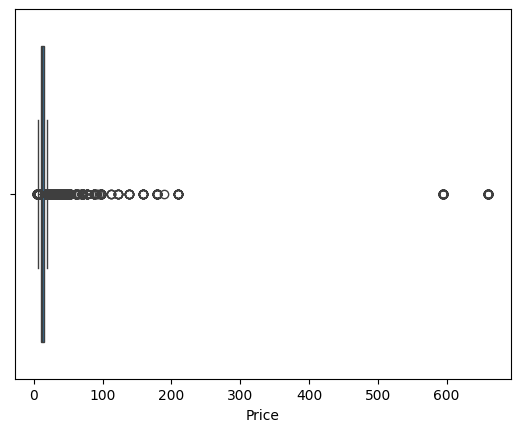

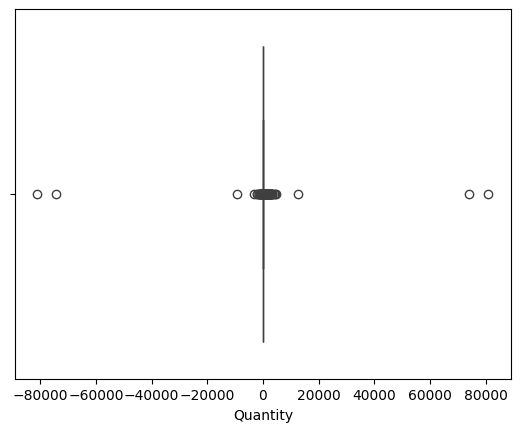

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

df_outlier=df_noduplicates.select_dtypes(exclude=['object', 'datetime64[ns]'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

### Outliers Gabungan AND

In [27]:
# Menghitung IQR untuk kolom Price
Q1_price = df_noduplicates['Price'].quantile(0.25)
Q3_price = df_noduplicates['Price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

# Menghitung IQR untuk kolom Quantity
Q1_qty = df_noduplicates['Quantity'].quantile(0.25)
Q3_qty = df_noduplicates['Quantity'].quantile(0.75)
IQR_qty = Q3_qty - Q1_qty

lower_bound_qty = Q1_qty - 1.5 * IQR_qty
upper_bound_qty = Q3_qty + 1.5 * IQR_qty


In [28]:
# Mask outlier untuk Price
mask_price = (df_noduplicates['Price'] < lower_bound_price) | (df_noduplicates['Price'] > upper_bound_price)

# Mask outlier untuk Quantity
mask_qty = (df_noduplicates['Quantity'] < lower_bound_qty) | (df_noduplicates['Quantity'] > upper_bound_qty)

# Mask gabungan: hanya baris yang outlier di kedua kolom
mask_intersection = mask_price & mask_qty

# Menampilkan jumlah baris yang dianggap outlier gabungan
print("Jumlah outlier (gabungan Price & Quantity):", mask_intersection.sum())


Jumlah outlier (gabungan Price & Quantity): 5795


In [29]:
# Membuat dataset baru tanpa baris outlier gabungan
df_intersect = df_noduplicates[~mask_intersection].copy()

print("Ukuran dataset sebelum penghapusan:", df_noduplicates.shape)
print("Ukuran dataset sesudah penghapusan:", df_intersect.shape)


Ukuran dataset sebelum penghapusan: (531095, 8)
Ukuran dataset sesudah penghapusan: (525300, 8)


### Outliers Gabungan AND & OR

In [30]:
# Untuk kolom Price
price_q1 = df_noduplicates['Price'].quantile(0.25)
price_q3 = df_noduplicates['Price'].quantile(0.75)
price_iqr = price_q3 - price_q1
price_lower_bound = price_q1 - 1.5 * price_iqr
price_upper_bound = price_q3 + 1.5 * price_iqr

# Buat mask untuk Price
price_mask = (df_noduplicates['Price'] >= price_lower_bound) & (df_noduplicates['Price'] <= price_upper_bound)

# Hitung jumlah outlier pada Price
price_outliers_count = df_noduplicates[~price_mask].shape[0]
print("Jumlah outliers pada Price:", price_outliers_count)

# Untuk kolom Quantity
quantity_q1 = df_noduplicates['Quantity'].quantile(0.25)
quantity_q3 = df_noduplicates['Quantity'].quantile(0.75)
quantity_iqr = quantity_q3 - quantity_q1
quantity_lower_bound = quantity_q1 - 1.5 * quantity_iqr
quantity_upper_bound = quantity_q3 + 1.5 * quantity_iqr

# Buat mask untuk Quantity
quantity_mask = (df_noduplicates['Quantity'] >= quantity_lower_bound) & (df_noduplicates['Quantity'] <= quantity_upper_bound)

# Hitung jumlah outlier pada Quantity
quantity_outliers_count = df_noduplicates[~quantity_mask].shape[0]
print("Jumlah outliers pada Quantity:", quantity_outliers_count)

# Gabungkan kedua mask (jika diperlukan)
combined_mask = price_mask & quantity_mask

# Data tanpa outlier berdasarkan gabungan mask
df_no_outliers = df_noduplicates[combined_mask]

# Tampilkan perbandingan dimensi data
print("Dimensi data sebelum menghapus outlier:", df_noduplicates.shape)
print("Dimensi data setelah menghapus outlier:", df_no_outliers.shape)


Jumlah outliers pada Price: 98356
Jumlah outliers pada Quantity: 57243
Dimensi data sebelum menghapus outlier: (531095, 8)
Dimensi data setelah menghapus outlier: (381291, 8)


## EDA - Univariate Analysis

Membagi kolom dataset menjadi dua kelompok: fitur numerik dan fitur kategorik.

In [31]:
# Fitur numerik: Price dan Quantity
numeric_features = ['Price', 'Quantity', 'Date']

# Fitur kategorik: sisanya (TransactionNo, ProductNo, ProductName, CustomerNo, Country)
categorical_features = ['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country']

print("Fitur Numerik:", numeric_features)
print("Fitur Kategorik:", categorical_features)

Fitur Numerik: ['Price', 'Quantity', 'Date']
Fitur Kategorik: ['TransactionNo', 'ProductNo', 'ProductName', 'CustomerNo', 'Country']


## **Analisis Fitur Numerik**

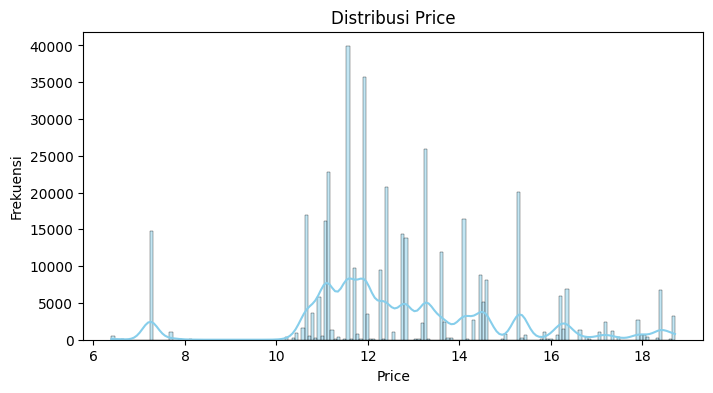

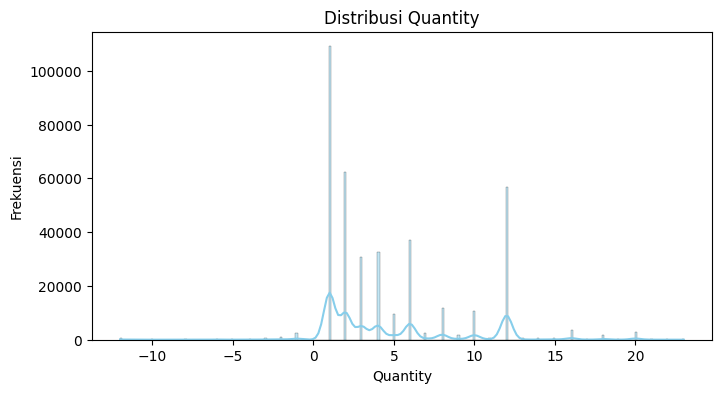

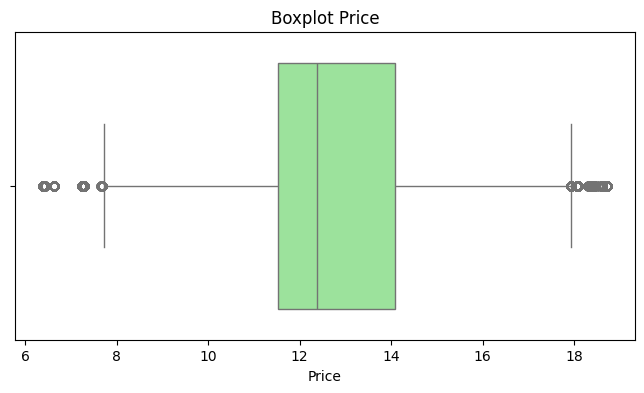

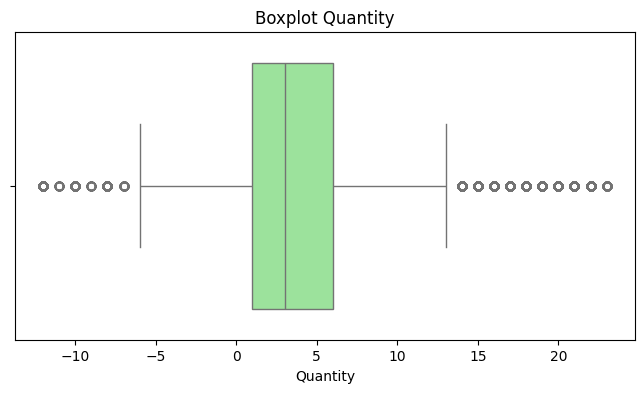

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram untuk Price dan Quantity
for col in ['Price', 'Quantity']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_no_outliers[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Boxplot untuk Price dan Quantity
for col in ['Price', 'Quantity']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_no_outliers[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()


<ipython-input-33-26c164048282>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Date_numeric'] = df_no_outliers['Date'].apply(lambda x: x.toordinal())


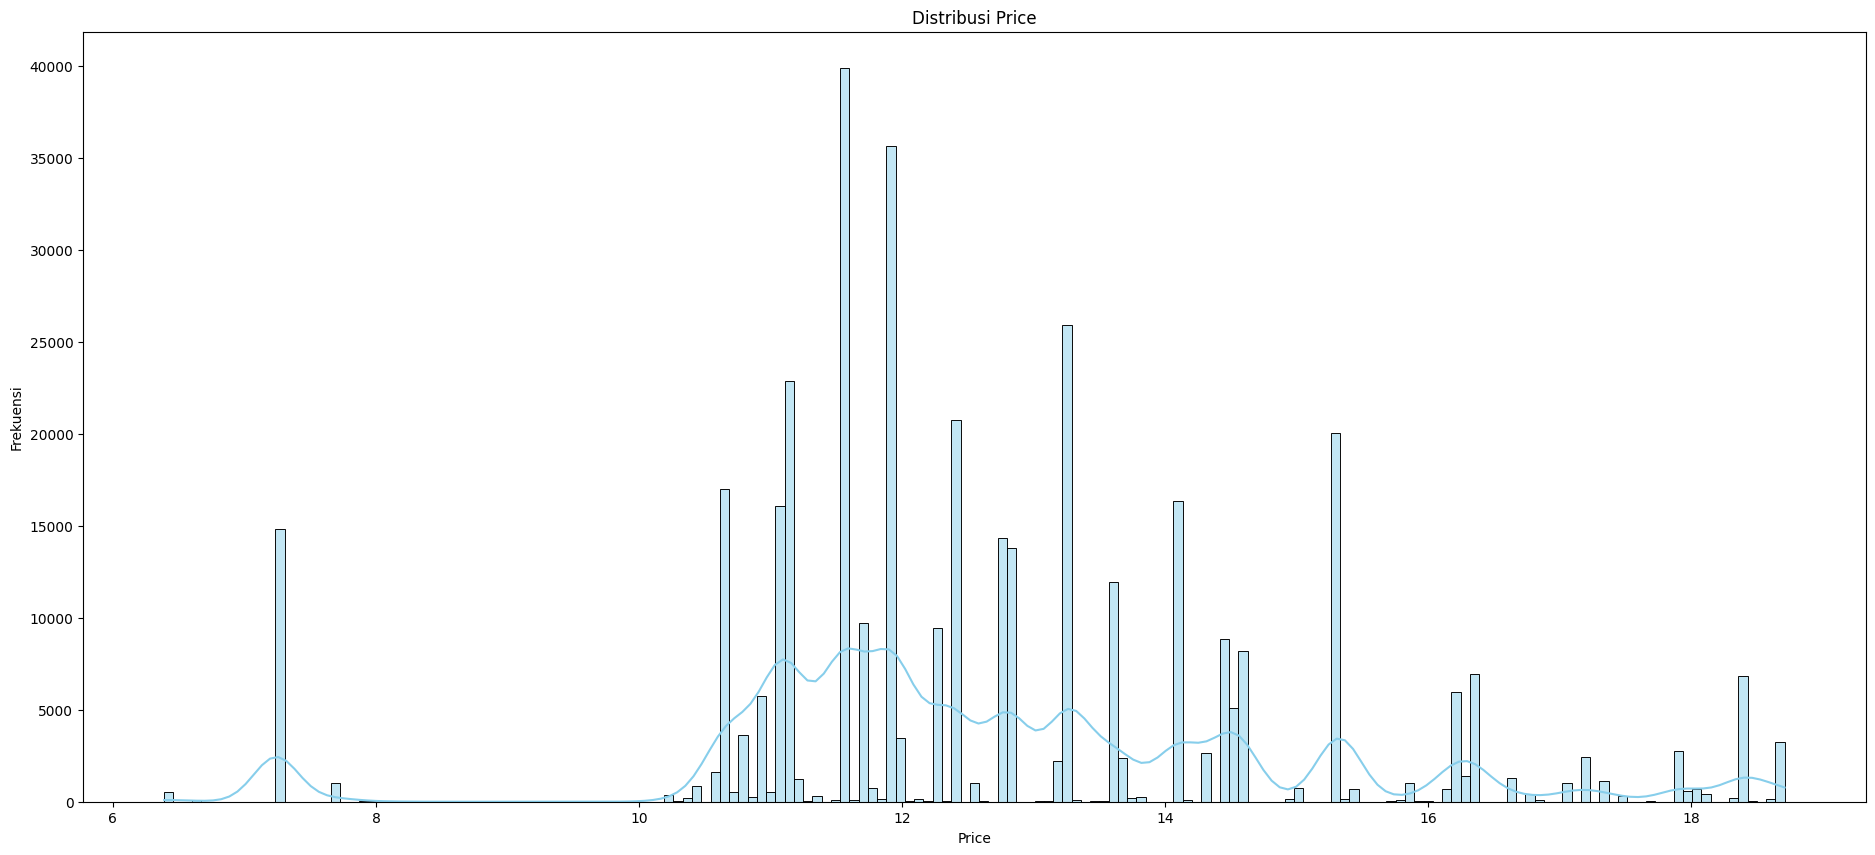

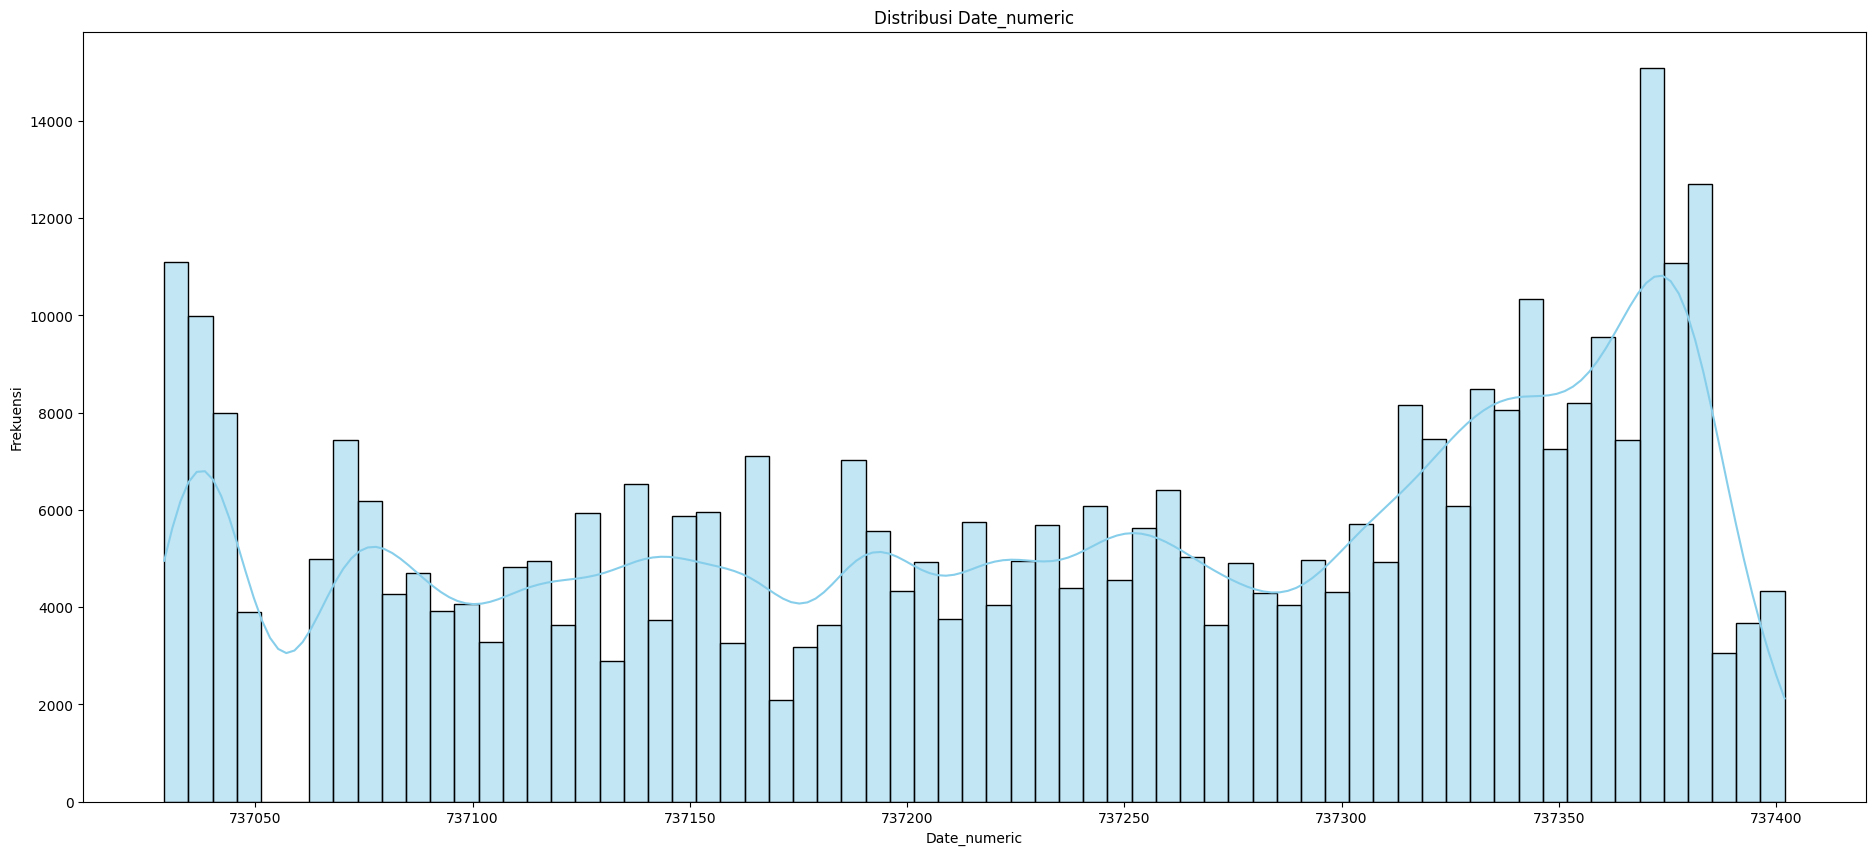

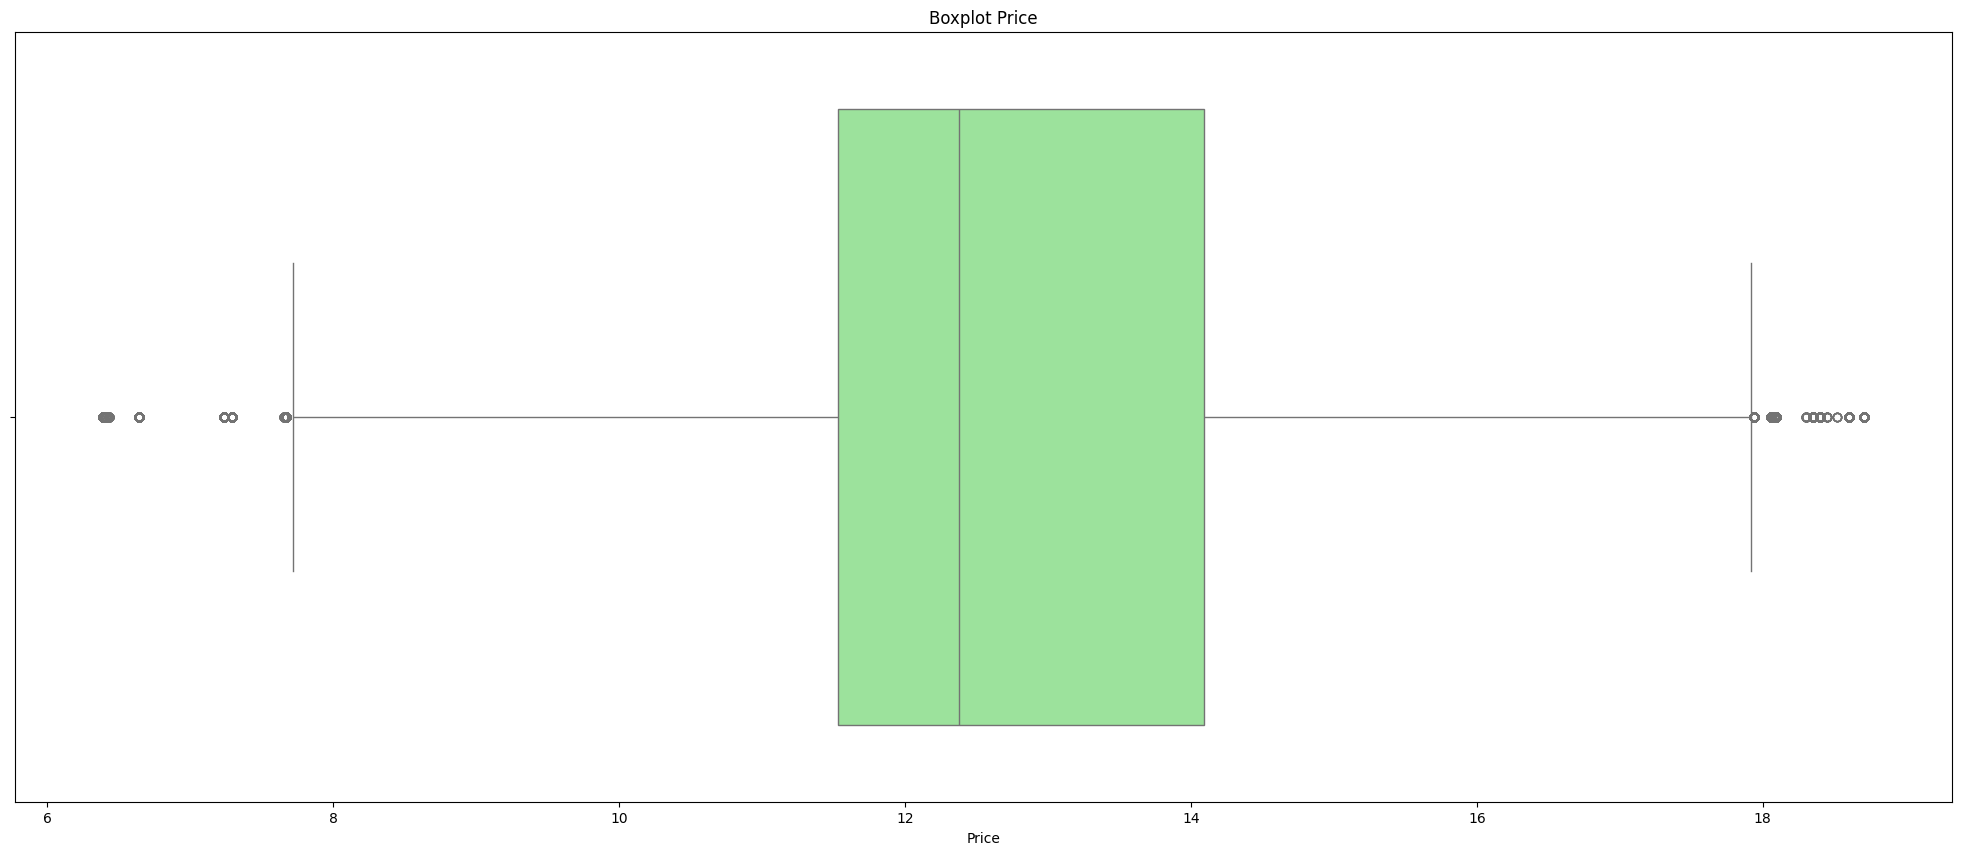

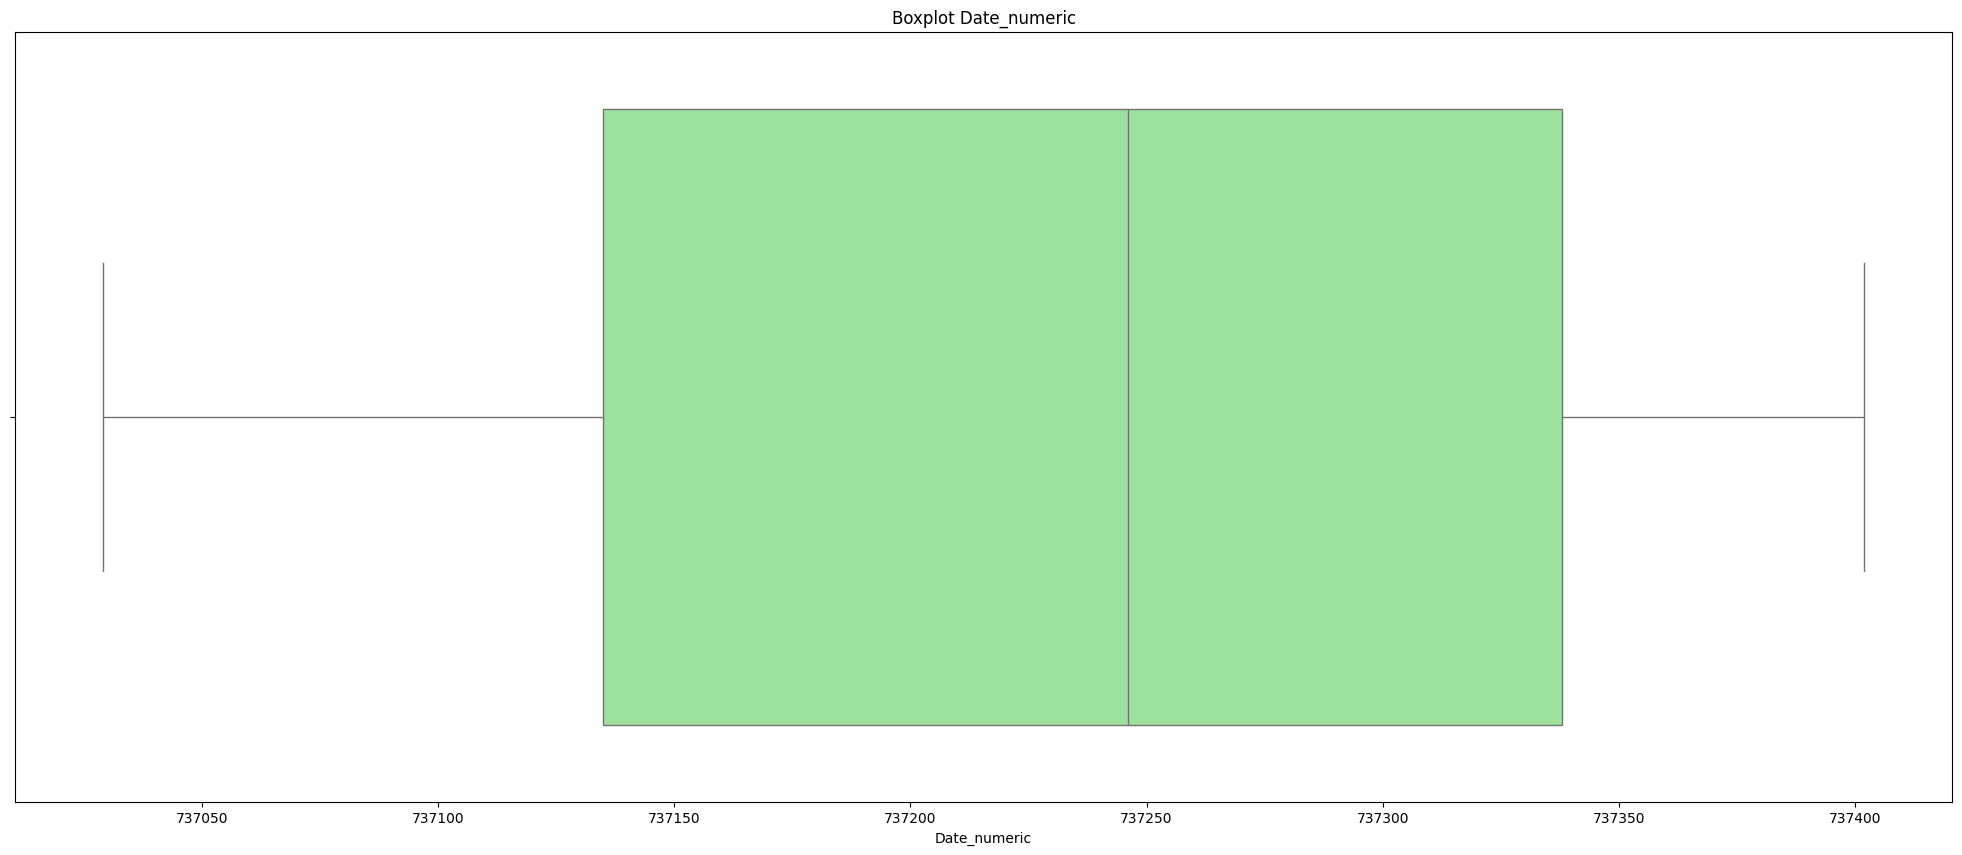

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Konversi kolom Date ke numeric (ordinal)
df_no_outliers['Date_numeric'] = df_no_outliers['Date'].apply(lambda x: x.toordinal())

# Histogram untuk Price dan Date_numeric
for col in ['Price', 'Date_numeric']:
    plt.figure(figsize=(23, 10))
    sns.histplot(df_no_outliers[col], kde=True, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

# Boxplot untuk Price dan Date_numeric
for col in ['Price', 'Date_numeric']:
    plt.figure(figsize=(25, 10))
    sns.boxplot(x=df_no_outliers[col], color='lightgreen')
    plt.title(f'Boxplot {col}')
    plt.xlabel(col)
    plt.show()


## **Analisis Fitur Kategorik**

<ipython-input-34-b11a0a7d8347>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')


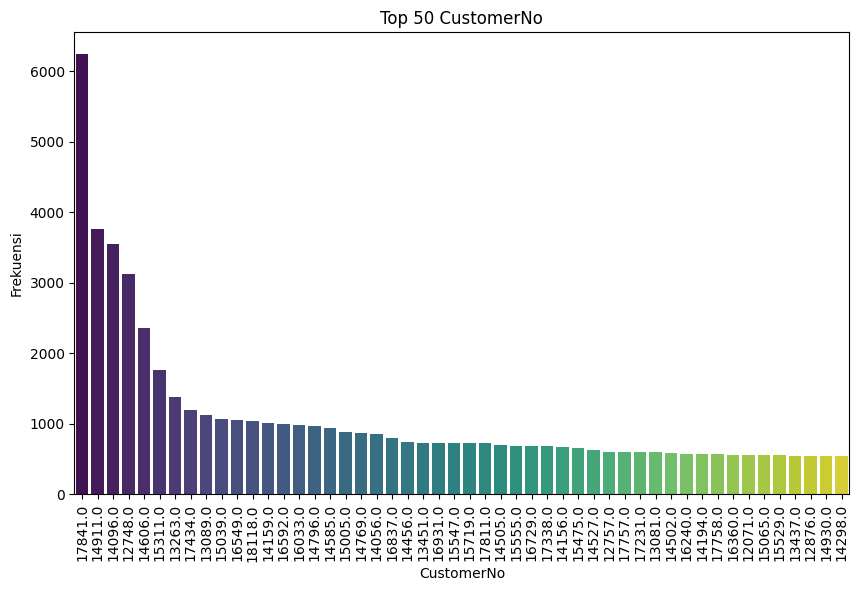

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 20 kategori terbanyak
top_15_products = df_no_outliers['CustomerNo'].value_counts().nlargest(50)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')
plt.title('Top 50 CustomerNo')
plt.xlabel('CustomerNo')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()


<ipython-input-35-36441fc05b5e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')


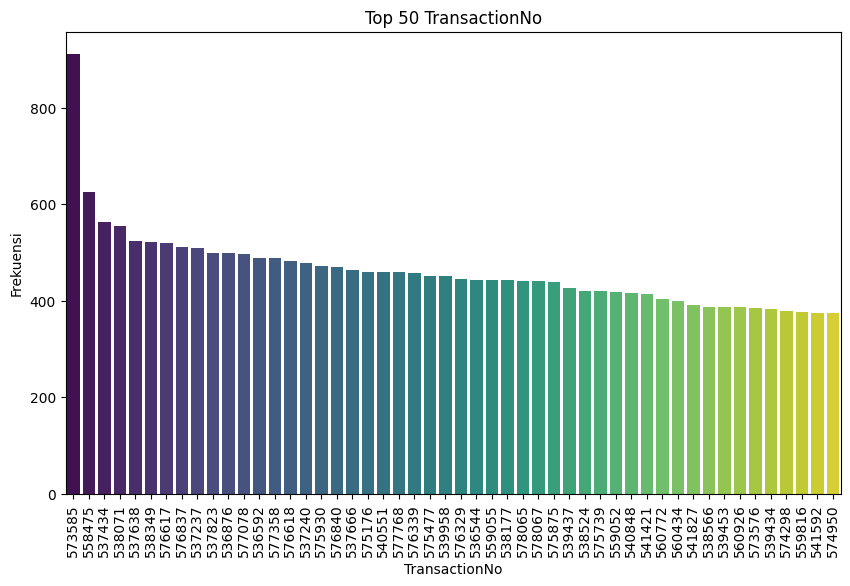

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil 20 kategori terbanyak
top_15_products = df_no_outliers['TransactionNo'].value_counts().nlargest(50)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_products.index, y=top_15_products.values, palette='viridis')
plt.title('Top 50 TransactionNo')
plt.xlabel('TransactionNo')
plt.ylabel('Frekuensi')
plt.xticks(rotation=90)
plt.show()


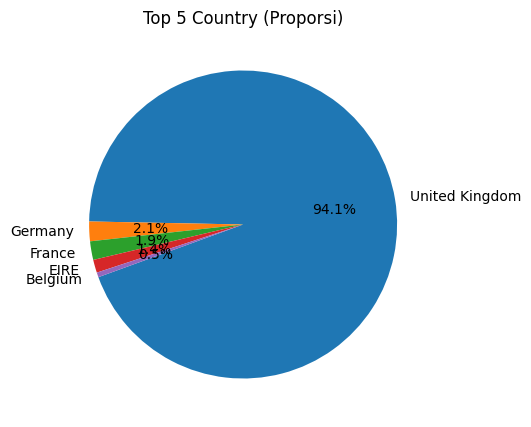

In [36]:
top_5_products = df_no_outliers['Country'].value_counts().nlargest(5)

plt.figure(figsize=(5,5))
plt.pie(top_5_products.values, labels=top_5_products.index, autopct='%1.1f%%', startangle=200)
plt.title('Top 5 Country (Proporsi)')
plt.show()


In [37]:
import pandas as pd

# Top 50 Produk Paling Sering Dibeli
top_50_products = df_no_outliers['ProductName'].value_counts().nlargest(50)
df_top_products = pd.DataFrame({'ProductName': top_50_products.index, 'Frekuensi': top_50_products.values})

# Top 50 CustomerNo dengan transaksi terbanyak
top_50_customers = df_no_outliers['CustomerNo'].value_counts().nlargest(50)
df_top_customers = pd.DataFrame({'CustomerNo': top_50_customers.index, 'Frekuensi': top_50_customers.values})

# Top 50 TransactionNo dengan frekuensi tertinggi
top_50_transactions = df_no_outliers['TransactionNo'].value_counts().nlargest(50)
df_top_transactions = pd.DataFrame({'TransactionNo': top_50_transactions.index, 'Frekuensi': top_50_transactions.values})

# Top 8 Negara dengan transaksi terbanyak
top_8_countries = df_no_outliers['Country'].value_counts().nlargest(8)
df_top_countries = pd.DataFrame({'Country': top_8_countries.index, 'Frekuensi': top_8_countries.values})
df_top_countries['Persentase'] = (df_top_countries['Frekuensi'] / df_no_outliers.shape[0]) * 100

# Menampilkan tabel
print("Top 50 Produk Paling Sering Dibeli:")
print(df_top_products)

print("\nTop 50 CustomerNo dengan Transaksi Terbanyak:")
print(df_top_customers)

print("\nTop 50 TransactionNo dengan Frekuensi Tertinggi:")
print(df_top_transactions)

print("\nTop 8 Negara dengan Transaksi Terbanyak:")
print(df_top_countries)


Top 50 Produk Paling Sering Dibeli:
                            ProductName  Frekuensi
0    Cream Hanging Heart T-Light Holder       1885
1                         Party Bunting       1281
2      Set Of 3 Cake Tins Pantry Design       1159
3        Natural Slate Heart Chalkboard       1155
4                Jumbo Storage Bag Suki       1073
5     Jumbo Shopper Vintage Red Paisley       1057
6         Assorted Colour Bird Ornament       1039
7       Recipe Box Pantry Yellow Design       1038
8                 Heart Of Wicker Small       1026
9     Wooden Picture Frame White Finish       1001
10               Jam Making Set Printed        976
11      Roses Regency Teacup And Saucer        969
12                       Popcorn Holder        968
13                       Spotty Bunting        967
14      Green Regency Teacup And Saucer        936
15         Set Of 4 Pantry Jelly Moulds        929
16             Alarm Clock Bakelike Red        908
17             Jam Making Set With Jars       

1. Top 50 Produk Paling Sering Dibeli
Frekuensi Tinggi pada Produk Tertentu:
Produk seperti Cream Hanging Heart T-Light Holder muncul dengan frekuensi 1885, diikuti oleh Party Bunting (1281) dan Set Of 3 Cake Tins Pantry Design (1159). Ini menunjukkan bahwa ada beberapa produk yang sangat populer.

Pola Produk:
Dari daftar produk, tampak dominasi produk-produk dekoratif, peralatan dapur, dan produk kerajinan.

Fitur Produk: Informasi frekuensi produk bisa dijadikan fitur (nanti akan dilakukan frequency encoding) untuk melihat apakah ada hubungan antara popularitas produk dan risiko pembatalan.

2. Top 50 CustomerNo dengan Transaksi Terbanyak
Pelanggan dengan Transaksi Tinggi:
Pelanggan dengan nomor seperti 17841.0 (6243 transaksi) dan 14911.0 (3761 transaksi) menunjukkan adanya kelompok pelanggan yang sangat aktif.

Fitur frekuensi transaksi pelanggan (melalui frequency encoding atau metrik agregat lain) dapat membantu model memahami pola perilaku pelanggan dan kemungkinan risiko pembatalan.
Segmentasi pelanggan berdasarkan frekuensi transaksi dapat memberikan insight tambahan untuk strategi retensi atau intervensi sebelum pembatalan terjadi.

3. Top 50 TransactionNo dengan Frekuensi Tertinggi
Repetisi TransactionNo:
Terlihat bahwa beberapa nomor transaksi muncul berkali-kali (misalnya, TransactionNo 573585 muncul 912 kali). Hal ini bisa menunjukkan bahwa:

Satu transaksi mungkin memiliki beberapa entri (misalnya, satu transaksi dengan beberapa produk).
Data transaksi dapat mengindikasikan besar kecilnya pesanan (jumlah item per transaksi).
Implikasi untuk Pembatalan:

Jika suatu transaksi terdiri dari banyak item, kegagalan dalam pemenuhan sebagian produk bisa berujung pada pembatalan keseluruhan.

4. Top 8 Negara dengan Transaksi Terbanyak
Dominasi Pasar UK:
Dengan 91,28% transaksi berasal dari United Kingdom, data menunjukkan bahwa mayoritas aktivitas transaksi terjadi secara domestik.

Distribusi Internasional:
Negara-negara seperti Jerman, Prancis, dan EIRE masing-masing menyumbang kurang dari 2% transaksi, sementara negara lain seperti Belgium, Spain, Switzerland, dan Portugal memiliki volume yang sangat kecil.

Kesimpulan dan Relevansi terhadap Problem Statement
Insight dari Produk dan Pelanggan:
Informasi univariate menunjukkan adanya variasi signifikan pada produk dan pelanggan. Dengan mengonversi data ini (misalnya melalui frequency encoding) menjadi fitur numerik, model dapat mengeksplorasi apakah produk dengan permintaan tinggi atau pelanggan dengan frekuensi tinggi memiliki kecenderungan pembatalan yang berbeda.

Dominasi Geografis:
Dengan mayoritas transaksi berasal dari UK, strategi prediksi pembatalan harus difokuskan pada karakteristik pasar domestik. Namun, analisis lebih lanjut bisa menguji apakah faktor geografis (misalnya, negara) memengaruhi pembatalan secara signifikan.

**Analisis Target Variable (Transaksi Dibatalkan)**

In [38]:
df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')
print("Frekuensi Transaksi Dibatalkan (tanpa outlier):")
print(df_no_outliers['IsCancelled'].value_counts())


Frekuensi Transaksi Dibatalkan (tanpa outlier):
IsCancelled
False    375655
True       5636
Name: count, dtype: int64


<ipython-input-38-11063f0854ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


<ipython-input-39-cd718e1c760e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_outliers['IsCancelled'], palette='muted')


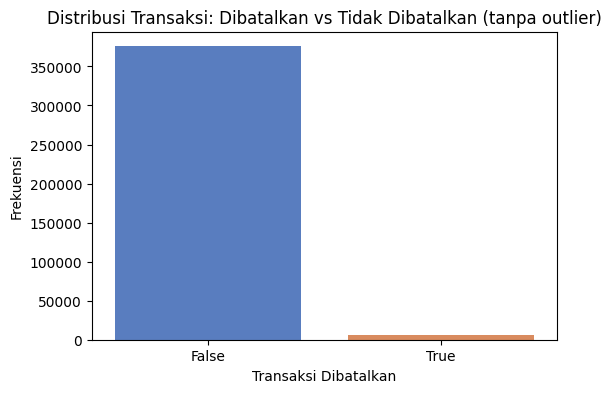

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df_no_outliers['IsCancelled'], palette='muted')
plt.title('Distribusi Transaksi: Dibatalkan vs Tidak Dibatalkan (tanpa outlier)')
plt.xlabel('Transaksi Dibatalkan')
plt.ylabel('Frekuensi')
plt.show()


## EDA - Multivariate Analysis

In [40]:
df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


<ipython-input-40-42c802e723bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers['TransactionNo'].str.contains('C')


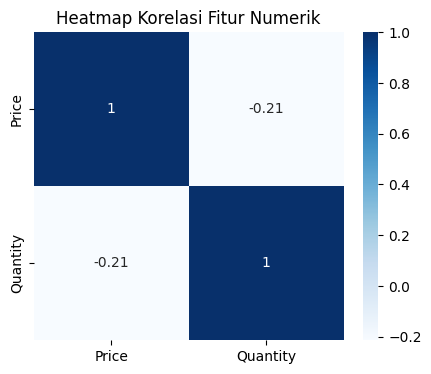

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Price', 'Quantity']
corr = df_no_outliers[numeric_cols].corr(method='pearson')

plt.figure(figsize=(5, 4))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()


Berdasarkan heatmap korelasi di atas, korelasi lemah antara Price dan Quantity menandakan keduanya tidak secara linear saling memengaruhi. Untuk memprediksi pembatalan transaksi, maka selanjutnya memerlukan fitur tambahan agar model dapat mempelajari pola yang lebih komprehensif dan relevan dengan pembatalan.

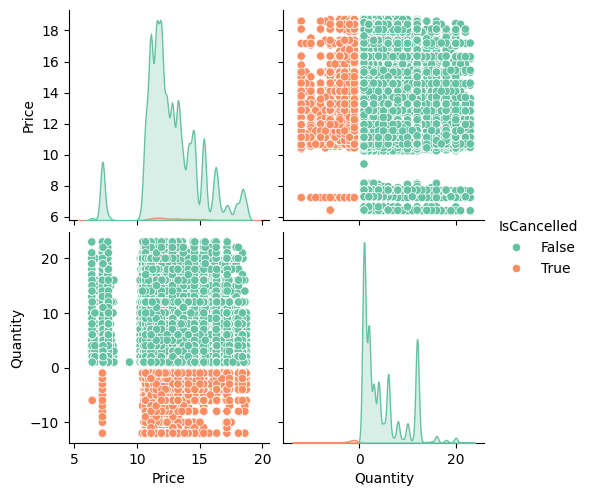

In [42]:
sns.pairplot(df_no_outliers[['Price', 'Quantity', 'IsCancelled']],
             hue='IsCancelled',
             diag_kind='kde',
             palette='Set2')
plt.show()


1. Distribusi Price dan Quantity

- Price: Distribusinya cenderung terkonsentrasi di kisaran 3–5, dengan sedikit transaksi di atas 10. Dari segi warna (IsCancelled), tidak tampak perbedaan mencolok antara transaksi dibatalkan (oranye) dan tidak dibatalkan (hijau). Ini menunjukkan bahwa harga tidak secara langsung membedakan transaksi yang dibatalkan vs. tidak.

- Quantity: Terdapat dua kluster utama:
Quantity positif (hijau) untuk transaksi yang berjalan normal.
Quantity negatif (oranye) yang sangat terkait dengan transaksi dibatalkan. Nilai negatif umumnya menandakan retur atau koreksi stok setelah pembatalan.

2. Hubungan Price vs. Quantity

- Tidak Ada Pola Linear Kuat: Plot sebar (scatter plot) tidak memperlihatkan hubungan linear yang jelas antara Price dan Quantity. Hal ini sejalan dengan korelasi Pearson yang rendah.

- Cluster Negatif Quantity = IsCancelled: Hampir semua titik oranye (IsCancelled = True) berada di area Quantity < 0, mengindikasikan bahwa data Quantity negatif berperan sebagai penanda kuat adanya pembatalan (atau retur).

# D. Data Preparation

## Menyiapkan data sebelum Modelling

## **a. Membuat Label Pembatalan**

In [43]:
# Label True jika TransactionNo mengandung 'C' atau Quantity negatif
df_no_outliers['IsCancelled'] = df_no_outliers.apply(
    lambda row: True if ('C' in row['TransactionNo'] or row['Quantity'] < 0) else False,
    axis=1
)

<ipython-input-43-912b189697ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['IsCancelled'] = df_no_outliers.apply(


## **b. Ekstraksi Fitur dari Kolom Date**

In [44]:
df_no_outliers['Month'] = df_no_outliers['Date'].dt.month
df_no_outliers['Day'] = df_no_outliers['Date'].dt.day
df_no_outliers['Weekday'] = df_no_outliers['Date'].dt.weekday  # 0: Senin, 6: Minggu

<ipython-input-44-6eca10f642eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Month'] = df_no_outliers['Date'].dt.month
<ipython-input-44-6eca10f642eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['Day'] = df_no_outliers['Date'].dt.day
<ipython-input-44-6eca10f642eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

## **c. Fitur Tambahan**
Membuat fitur 'HighPrice' untuk menandai produk dengan harga di atas median

In [45]:
median_price = df_no_outliers['Price'].median()
df_no_outliers['HighPrice'] = df_no_outliers['Price'] > median_price

<ipython-input-45-391ed765ff9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['HighPrice'] = df_no_outliers['Price'] > median_price


d. Encoding Kategorik Fitur

In [46]:
# Ubah kolom-kolom identifier dan kategorikal menjadi string
df_no_outliers['CustomerNo'] = df_no_outliers['CustomerNo'].astype(str)
df_no_outliers['TransactionNo'] = df_no_outliers['TransactionNo'].astype(str)
df_no_outliers['ProductNo'] = df_no_outliers['ProductNo'].astype(str)
df_no_outliers['Country'] = df_no_outliers['Country'].astype(str)

#frequency encoding untuk ProductName, CustomerNo, ProductNo, dan Country
df_no_outliers['ProductName_freq'] = df_no_outliers['ProductName'].map(df_no_outliers['ProductName'].value_counts())
df_no_outliers['CustomerNo_freq'] = df_no_outliers['CustomerNo'].map(df_no_outliers['CustomerNo'].value_counts())
df_no_outliers['ProductNo_freq'] = df_no_outliers['ProductNo'].map(df_no_outliers['ProductNo'].value_counts())
df_no_outliers['Country_freq'] = df_no_outliers['Country'].map(df_no_outliers['Country'].value_counts())

#hapus kolom yang masih berbentuk string, karena informasi kategorikal sudah direpresentasikan melalui frequency encoding
df_prepared = df_no_outliers.drop(['ProductName', 'CustomerNo', 'TransactionNo', 'ProductNo', 'Country'], axis=1)

<ipython-input-46-e40199bb8e35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['CustomerNo'] = df_no_outliers['CustomerNo'].astype(str)
<ipython-input-46-e40199bb8e35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['TransactionNo'] = df_no_outliers['TransactionNo'].astype(str)
<ipython-input-46-e40199bb8e35>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

## **e. scaling fitur numerik**

In [47]:
from sklearn.preprocessing import StandardScaler

# Pilih fitur numerik yang akan diskalakan
numeric_features = ['Price', 'HighPrice', 'Quantity', 'Month', 'Day', 'Weekday',
                    'ProductName_freq', 'CustomerNo_freq', 'ProductNo_freq', 'Country_freq']
scaler = StandardScaler()
df_prepared[numeric_features] = scaler.fit_transform(df_prepared[numeric_features])


## **f. split data**

In [50]:
from sklearn.model_selection import train_test_split
# Hapus juga kolom 'Date' karena informasi waktu sudah diekstraksi
X = df_prepared.drop(['IsCancelled', 'Date'], axis=1)
y = df_prepared['IsCancelled']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Dimensi Training Set:", X_train.shape)
print("Dimensi Testing Set:", X_test.shape)

Dimensi Training Set: (305032, 11)
Dimensi Testing Set: (76259, 11)


## SMOTE & Undersample untuk mengatasi keseimbangan data

In [51]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Penanganan Imbalanced Data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Distribusi kelas setelah SMOTE:")
print(y_train_res.value_counts())


Distribusi kelas setelah SMOTE:
IsCancelled
False    300523
True     300523
Name: count, dtype: int64


In [52]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Inisialisasi RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Lakukan undersampling pada data training
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Distribusi kelas setelah Random Undersampling:")
print(y_train_rus.value_counts())

Distribusi kelas setelah Random Undersampling:
IsCancelled
False    4509
True     4509
Name: count, dtype: int64


# E. Model Development
* LogisticRegression
* RandomForestClassifier
* DecisionTreeClassifier

## LogisticRegression setelah dilakukan SMOTE

In [53]:
# Import library model development dan evaluasi
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

print("### Logistic Regression ###")
print(classification_report(y_test, y_pred_lr))

### Logistic Regression ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259



Logistic Regression dalam konfigurasi ini berhasil  memprediksi transaksi yang dibatalkan.

## RandomForestClassifier setelah dilakukan SMOTE

In [54]:
# 2. Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("### Random Forest Classifier ###")
print(classification_report(y_test, y_pred_rf))

### Random Forest Classifier ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259



Model Random Forest Classifier menyelesaikan problem statement dengan sangat baik pada dataset ini, dengan performa 100% pada metrik evaluasi di data testing.

## DecisionTreeClassifier setelah dilakukan SMOTE

In [55]:
# 3. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

print("### Decision Tree Classifier ###")
print(classification_report(y_test, y_pred_dt))

### Decision Tree Classifier ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259



Model Decision Tree Classifier, berdasarkan hasil yang ditunjukkan, telah berhasil mengklasifikasikan transaksi dengan benar (baik yang dibatalkan maupun tidak) pada data testing.

## Random Sample setelah dilakukan Undersample

In [56]:

#Random Forest
rf_undersample = RandomForestClassifier(random_state=42)
rf_undersample.fit(X_train_rus, y_train_rus)

# Prediksi pada data testing
y_pred_undersample = rf_undersample.predict(X_test)

print("###Random Forest dengan Undersampling ###")
print(classification_report(y_test, y_pred_undersample))


###Random Forest dengan Undersampling ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259



Model Random Forest dengan undersampling sangat efektif dalam menyelesaikan problem statement prediksi pembatalan transaksi pada dataset ini.

# F. Evaluasi Model

## SMOTE menggunakan LogisticRegression, RandomForestClassifier, dan DecisionTreeClassifier

### Evaluasi Logistic Regression ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259

Confusion Matrix:
[[75132     0]
 [    0  1127]]
Accuracy: 1.0
ROC AUC: 1.0


### Evaluasi Random Forest ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259

Confusion Matrix:
[[75132     0]
 [    0  1127]]
Accuracy: 1.0
ROC AUC: 1.0


### Evaluasi Decision Tree ###
              precision    recall  f1-score   support

       False       1.00      1.00   

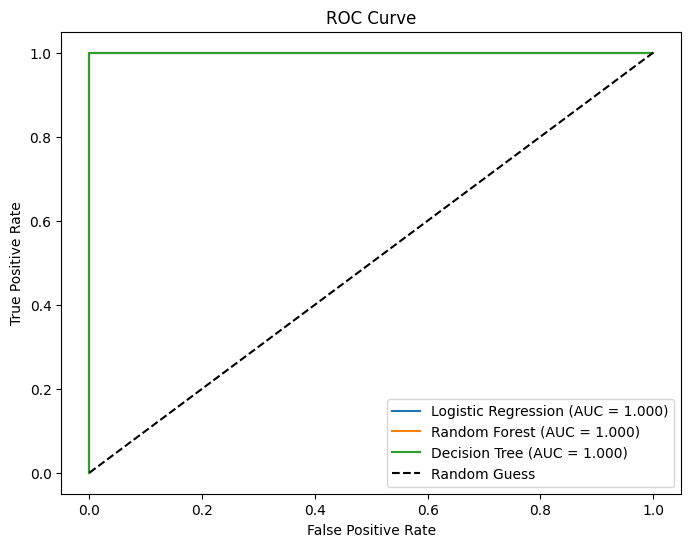

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Evaluasi untuk Logistic Regression
print("### Evaluasi Logistic Regression ###")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

# Jika model mendukung predict_proba, kita hitung ROC-AUC
if hasattr(lr, "predict_proba"):
    y_proba_lr = lr.predict_proba(X_test)[:, 1]
    auc_lr = roc_auc_score(y_test, y_proba_lr)
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
    print("ROC AUC:", auc_lr)
else:
    print("Logistic Regression tidak mendukung predict_proba.")

print("\n" + "="*50 + "\n")

# Evaluasi untuk Random Forest
print("### Evaluasi Random Forest ###")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

if hasattr(rf, "predict_proba"):
    y_proba_rf = rf.predict_proba(X_test)[:, 1]
    auc_rf = roc_auc_score(y_test, y_proba_rf)
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
    print("ROC AUC:", auc_rf)
else:
    print("Random Forest tidak mendukung predict_proba.")

print("\n" + "="*50 + "\n")

# Evaluasi untuk Decision Tree
print("### Evaluasi Decision Tree ###")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

if hasattr(dt, "predict_proba"):
    y_proba_dt = dt.predict_proba(X_test)[:, 1]
    auc_dt = roc_auc_score(y_test, y_proba_dt)
    fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
    print("ROC AUC:", auc_dt)
else:
    print("Decision Tree tidak mendukung predict_proba.")

# Plot ROC Curve untuk ketiga model (hanya jika predict_proba tersedia)
plt.figure(figsize=(8, 6))
if 'y_proba_lr' in locals():
    plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {auc_lr:.3f})")
if 'y_proba_rf' in locals():
    plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.3f})")
if 'y_proba_dt' in locals():
    plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


## Undersampling dengan RandomForest

In [58]:
# Evaluasi
print("### Evaluasi Random Forest dengan Undersampling ###")
print(classification_report(y_test, y_pred_undersample))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_undersample))
print("Accuracy:", accuracy_score(y_test, y_pred_undersample))

### Evaluasi Random Forest dengan Undersampling ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259

Confusion Matrix:
[[75132     0]
 [    0  1127]]
Accuracy: 1.0


## Validasi Model dengan StratifiedKFold Cross-Validation

In [59]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# Misalnya, gunakan model Random Forest yang sudah dikembangkan
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Menggunakan f1_macro sebagai metrik evaluasi, misalnya
scores = cross_val_score(rf_undersample, X_train, y_train, cv=skf, scoring='f1_macro')

print("F1 Macro Scores per Fold:", scores)
print("Rata-rata F1 Macro Score:", np.mean(scores))


F1 Macro Scores per Fold: [1. 1. 1. 1. 1.]
Rata-rata F1 Macro Score: 1.0


In [60]:
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Buat objek StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Kita asumsikan bahwa untuk Logistic Regression, Random Forest, dan Decision Tree
# data training yang digunakan adalah hasil oversampling (X_train_res, y_train_res)
# Sedangkan untuk Random Forest dengan Undersampling, kita gunakan X_train_rus, y_train_rus

# 1. Logistic Regression
lr_cv = LogisticRegression(max_iter=1000, random_state=42)
lr_scores = cross_val_score(lr_cv, X_train_res, y_train_res, cv=skf, scoring='f1_macro')
print("Logistic Regression CV Mean F1 Macro: {:.4f} (Std: {:.4f})".format(np.mean(lr_scores), np.std(lr_scores)))

# 2. Random Forest Classifier (Oversampled)
rf_cv = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf_cv, X_train_res, y_train_res, cv=skf, scoring='f1_macro')
print("Random Forest (Oversampled) CV Mean F1 Macro: {:.4f} (Std: {:.4f})".format(np.mean(rf_scores), np.std(rf_scores)))

# 3. Decision Tree Classifier (Oversampled)
dt_cv = DecisionTreeClassifier(random_state=42)
dt_scores = cross_val_score(dt_cv, X_train_res, y_train_res, cv=skf, scoring='f1_macro')
print("Decision Tree (Oversampled) CV Mean F1 Macro: {:.4f} (Std: {:.4f})".format(np.mean(dt_scores), np.std(dt_scores)))

# 4. Random Forest Classifier dengan Undersampling
rf_rus_cv = RandomForestClassifier(random_state=42)
rf_rus_scores = cross_val_score(rf_rus_cv, X_train_rus, y_train_rus, cv=skf, scoring='f1_macro')
print("Random Forest (Undersampled) CV Mean F1 Macro: {:.4f} (Std: {:.4f})".format(np.mean(rf_rus_scores), np.std(rf_rus_scores)))

# --- Evaluasi pada Data Testing ---
print("\nEvaluasi pada Data Testing:")

# Logistic Regression
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)
print("### Logistic Regression on Test Set ###")
print(classification_report(y_test, y_pred_lr))

# Random Forest (Oversampled)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)
print("### Random Forest (Oversampled) on Test Set ###")
print(classification_report(y_test, y_pred_rf))

# Decision Tree (Oversampled)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)
print("### Decision Tree (Oversampled) on Test Set ###")
print(classification_report(y_test, y_pred_dt))

# Random Forest (Undersampled)
rf_undersample.fit(X_train_rus, y_train_rus)
y_pred_rf_rus = rf_undersample.predict(X_test)
print("### Random Forest (Undersampled) on Test Set ###")
print(classification_report(y_test, y_pred_rf_rus))


Logistic Regression CV Mean F1 Macro: 1.0000 (Std: 0.0000)
Random Forest (Oversampled) CV Mean F1 Macro: 1.0000 (Std: 0.0000)
Decision Tree (Oversampled) CV Mean F1 Macro: 1.0000 (Std: 0.0000)
Random Forest (Undersampled) CV Mean F1 Macro: 1.0000 (Std: 0.0000)

Evaluasi pada Data Testing:
### Logistic Regression on Test Set ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00      1.00      1.00     76259

### Random Forest (Oversampled) on Test Set ###
              precision    recall  f1-score   support

       False       1.00      1.00      1.00     75132
        True       1.00      1.00      1.00      1127

    accuracy                           1.00     76259
   macro avg       1.00      1.00      1.00     76259
weighted avg       1.00

# SAVE

In [ ]:
df_no_outliers.to_csv('df_clean.csv', index=False)